# Selecting the Ideal Basketball Starting Lineup Using Combinatorial Optimization Algorithms

Author: Erik Cabeza

Welcome to this notebook that explains how to use algorithms to determine the starting lineup of a basketball team based on the needs of the game. This notebook is structured as follows:



1.   Problem Statement
2.   Datasets Overview
3.   Feature Engineering
4.   Introduction to Combinatorial Optimization
5.   Integer Linear Programming
6.   Genetic Algorithms
7.   Conclusions
8.   Case Study: Unicaja (Spanish ACB Basketball League), Season 2023/2024






# 1. Problem Statement

In the world of basketball, where strategy and precision are essential, the selection of the optimal starting lineup can be a game-changer. Coaches are faced with the challenge of crafting lineups that not only align with player strengths but also strategically address the ever-evolving dynamics of the game.

In this notebook, we explain how combinatorial optimization algorithms can facilitate the decision-making process to determine the best starting five based on the team's needs at that moment.

In the context of basketball, using algorithms to determine the optimal starting lineup proves particularly beneficial for less resource-endowed teams, where the coaches face the task of making critical deciscions without the support of an extensive team of analysts. These algorithms help coaches to craft the better starting five for their team, and they allow teams with modest resources to tap into data-driven insights and elevate their gameplay on a competitive stage.

# 2. Datasets Overview

We're going to work with the following datasets:



1.   Philadelphia 76ers Season 2023-2024.
2.   Boston Celtics Season 2023-2024.
3.   Los Angeles Lakers Season 2023-2024.

All the datasets contain the players stats during the season 2023-2024. The data has been obtained until 2024-01-02, [from the NBA official stats page](https://www.nba.com/stats/players/traditional).


Each of these three datasets have the following columns:

1. **POSITION:**
   - Indicates the playing position of the player. These positions can be PG (Point Guard), SG (Shooting Guard), SF (Small Forward), PF (Power Forward) and C (Center). A player can also play in several positions. For example, the player Jayson Tatum can play as SF or PF.

2. **PLAYER:**
   - Contains the names of the player.

3. **TEAM:**
   - Represents the team affiliation of the player.

4. **AGE:**
   - Indicates the age of the player.

5. **GP (Games Played):**
   - Shows the total number of games the player has participated in.

6. **W (Wins):**
   - Represents the number of games won by the player.

7. **L (Losses):**
   - Represents the number of games lost by the player.

8. **MIN (Minutes Played):**
   - Reflects the average number of minutes the player has spent on the court per game.

9. **PTS (Points):**
   - Indicates the average number of points scored by the player per game.

10. **FGM (Field Goals Made):**
    - Represents the average number of successful field goals made by the player per game.

11. **FGA (Field Goals Attempted):**
    - Represents the average number of field goal attempts by the player per game.

12. **FG% (Field Goal Percentage):**
    - Reflects the average percentage of successful field goals.

13. **3PM (Three-Pointers Made):**
    - Indicates the average number of successful three-point shots made by the player per game.

14. **3PA (Three-Pointers Attempted):**
    - Represents the average number of three-point shot attempts by the player per game.

15. **3P% (Three-Point Percentage):**
    - Reflects the percentage of successful three-point shots.

16. **FTM (Free Throws Made):**
    - Indicates the average number of successful free throws made by the player per game.

17. **FTA (Free Throws Attempted):**
    - Represents the average number of free throw attempts by the player per game.

18. **FT% (Free Throw Percentage):**
    - Reflects the percentage of successful free throws.

19. **OREB (Offensive Rebounds):**
    - Indicates the average number of offensive rebounds grabbed by the player per game.

20. **DREB (Defensive Rebounds):**
    - Represents the average number of defensive rebounds grabbed by the player per game.

21. **REB (Total Rebounds):**
    - Reflects the average number of rebounds (offensive + defensive) grabbed by the player per game.

22. **AST (Assists):**
    - Indicates the average number of assists made by the player per game.

23. **TOV (Turnovers):**
    - Represents the average number of turnovers committed by the player per game.

24. **STL (Steals):**
    - Indicates the average number of steals made by the player per game.

25. **BLK (Blocks):**
    - Represents the average number of shots blocked by the player per game.

26. **PF (Personal Fouls):**
    - Indicates the average number of personal fouls committed by the player per game.

27. **FP (Fantasy Points):**
    - Represents a calculated value based on the player's statistical performance, commonly used in fantasy basketball.

28. **DD2 (Double-Doubles):**
    - Indicates the total number of games in which the player achieved a double-double (e.g., double digits in points and rebounds).

29. **TD3 (Triple-Doubles):**
    - Indicates the total number of games in which the player achieved a triple-double (e.g., double digits in three statistical categories).

30. **PLUS MINUS:**
    - Represents the average point differential when the player is on the court, indicating how much their team outscored (+) or was outscored (-) during that time.



In the following block of code, we're going to read the datasets.



In [ ]:
#Import the necessary Python libraries that we're going to use
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.optimize import linprog

#Read each of the three dataframes
philadelphia = pd.read_csv('/content/philadelphia.csv')
lakers = pd.read_csv('/content/lakers.csv')
boston  = pd.read_csv('/content/boston.csv')

philadelphia.head(3)

ROW NUMBER         PLAYER TEAM POSITION  AGE  GP   W   L   MIN   PTS  ...  \
0           1    Joel Embiid  PHI        C   29  25  20   5  34.2  35.0  ...   
1           2   Tyrese Maxey  PHI    PG/SG   23  31  22   9  37.3  26.1  ...   
2           3  Tobias Harris  PHI    SF/PF   31  32  22  10  34.1  17.2  ...   

    REB  AST  TOV  STL  BLK   PF    FP   DD2  TD3  PLUS MINUS  
0  11.7  6.0  3.8  1.2  2.0  2.8  63.5  21.0  1.0         9.8  
1   3.8  6.5  1.5  0.8  0.5  2.1  42.8   6.0  0.0         9.5  
2   6.1  3.1  1.7  1.0  0.5  1.7  32.0   2.0  0.0         6.3  

[3 rows x 31 columns]

In [ ]:
print(philadelphia.shape)
print(lakers.shape)
print(boston.shape)

(19, 31)
(17, 31)
(16, 31)


In [ ]:
philadelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ROW NUMBER  19 non-null     int64  
 1   PLAYER      19 non-null     object 
 2   TEAM        19 non-null     object 
 3   POSITION    19 non-null     object 
 4   AGE         19 non-null     int64  
 5   GP          19 non-null     int64  
 6   W           19 non-null     int64  
 7   L           19 non-null     int64  
 8   MIN         19 non-null     float64
 9   PTS         19 non-null     float64
 10  FGM         19 non-null     float64
 11  FGA         19 non-null     float64
 12  FG%         19 non-null     float64
 13  3PM         19 non-null     float64
 14  3PA         19 non-null     float64
 15  3P%         19 non-null     float64
 16  FTM         19 non-null     float64
 17  FTA         19 non-null     float64
 18  FT%         19 non-null     float64
 19  OREB        19 non-null     flo

In [ ]:
#We are going to filter the dataset to just keep players who played more than 5 games
#Players who participate in a larger number of games are likely to provide a more consistent performance measure
#This can be important for evaluating their overall impact on the team.

philadelphia = philadelphia[philadelphia['GP'] > 5].reset_index(drop=True)
lakers = lakers[lakers['GP'] > 5].reset_index(drop=True)
boston = boston[boston['GP'] > 5].reset_index(drop=True)

# 3. Feature Engineering

We're going to add some additional columns to the three dataframes. This columns are going to contain some advanced basketball stats:

## Effective Field Goal Percentage (eFG%)

The Effective Field Goal Percentage takes into account the added value of three-point shots. It is calculated using the formula:

`eFG_percentage = (field_goals_made + 0.5 * three_point_field_goals_made) / field_goals_attempted`

A higher eFG% indicates better shooting efficiency.

## True Shooting Percentage (TS%)

The True Shooting Percentage provides a comprehensive measure of scoring efficiency by considering field goals, three-pointers, and free throws. The formula is:


```
true_shooting_percentage = points / (2 * (field_goals_attempted + 0.44 * free_throws_attempted))
```

TS% accounts for the varying point values of different shots.




In [ ]:
#Adding the column "Effective Field Goal Percentage"  to the three dataframes
philadelphia['eFG%'] = (philadelphia['FGM'] + 0.5 * philadelphia['3PM']) / philadelphia['FGA']
#If the metric 'FGA' is zero, the division will result in NaN, so we have to deal with it
# Replace NaN values with zero
philadelphia['eFG%'] = philadelphia['eFG%'].fillna(0)

lakers['eFG%'] = (lakers['FGM'] + 0.5 * lakers['3PM']) / lakers['FGA']
lakers['eFG%'] = lakers['eFG%'].fillna(0)

boston['eFG%'] = (boston['FGM'] + 0.5 * boston['3PM']) / boston['FGA']
boston['eFG%'] = boston['eFG%'].fillna(0)

In [ ]:
#Adding the column "True Shooting Percentage" to the three dataframes
philadelphia['TS%'] = philadelphia['PTS'] / (2 * (philadelphia['FGA'] + 0.44 * philadelphia['FTA']))
# Replace NaN values with zero
philadelphia['TS%'] = philadelphia['TS%'].fillna(0)

lakers['TS%'] = lakers['PTS'] / (2 * (lakers['FGA'] + 0.44 * lakers['FTA']))
lakers['TS%'] = lakers['TS%'].fillna(0)

boston['TS%'] = boston['PTS'] / (2 * (boston['FGA'] + 0.44 * boston['FTA']))
boston['TS%'] = boston['TS%'].fillna(0)

# 4. Introduction to Combinatorial Optimization

Combinatorial optimization is a field of mathematics and computer science that deals with finding the best possible solution from a finite set of possible options. It involves making optimal decisions when faced with a multitude of choices.

**Example in the context of basketball**

Imagine a basketball coach who wants to determine the best starting lineup for their team to maximize the scoring potential. The coach has a pool of players, each with different scoring abilities, positions, and playing styles. The goal is to find the combination of players that yields the highest total score when they are on the court together.

**Elements**



*   **Players**: Each player has a unique scoring ability, position, and contribution to the team.
*   **Constraints**: There are limitations, such as the number of players allowed on the court, positions that need to be filled (point guard, shooting guard, etc.), and any other team strategy considerations.
*   **Objective Function**: The coach's objective is to maximize the total scoring output of the starting five.

There are several methods to tackle combinatorial optimization problems, each suited to different types of problems. In this notebook, we are going to try two of these methods:

*   Integer Linear Programming
*   Genetic Algorithms













# 5. Integer Linear Programming

Integer Linear Programming (ILP) is a mathematical optimization technique that helps finding the best solution to a problem by assigning values to decision variables while satisfying certain constraints and optimizing an objective function.

This technique is suitable for small datasets, such as the ones we're working with in this notebook.

For example, let's consider that we want to find the best defensive starting five for our basketball team. We have the following elements in our problem:


*  **Decision Variables.** These are the variables you want to determine. In the basketball context, these variables could represent whether a player is in the starting lineup or not.
*   **Objective Function.** This is what you want to maximize or minimize. For defense, you might want to maximize a combined defensive metric like steals, blocks, and defensive rebounds. The objective function would be a combination of these metrics for all selected players in the starting lineup.
*   **Constraints.** These are the limitations or conditions that the solution must satisfy. For example, you might have constraints that ensure two guards, two forwards, and one center are in the starting lineup.
*   **Integer Variables.** The term "Integer" in ILP means that the decision variables are constrained to be integers, specifically 0 or 1. This is crucial in the basketball context because a player is either in the starting lineup (1) or not (0).
*   **Optimization Process.** ILP uses optimization algorithms to find the best combination of decision variable values (0 or 1) that satisfy the constraints and optimize the objective function. In this scenario, it would determine the best combination of players in the starting lineup to maximize defensive performance.

The objective function to minimize is the combined defensive metric "Z":

*   The element "x" a binary decision variable representing whether player "i" is in the starting lineup (x_i=1) or not (x_i=0).
*   The element "a" is a combined metric of defensive performance for player "i". In this simplified example, we'll use a_i = STL_i + BLK_i + DREB_i.



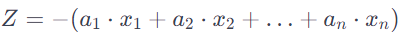

The constraints are the following ones:


*   Select exactly 5 players: x_1 + x_2 + ... + x_n = 5
*   Non-negativity constraint: x_i >=0 for all i.
*   Binary constraint: x_i is binary (0 or 1) for all i.

The linear programming problem is to minimize the combined defensive metric "Z" while satisfying the constraints.

Let's apply this algorithm to our three dataframes to answer the following questions:

*   Who forms the most proficient shooting starting five?
*   Who forms the most defensive starting five?
*   What players are part of the most effective starting five, in offense and defense?













# 5.1. Philadelphia 76ers, Season 2023-2024



In [ ]:
#A-Finding the most proficient shooting starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.25 * (philadelphia['3PM'] / philadelphia['MIN']) +
    0.20 * (philadelphia['FGM'] / philadelphia['MIN']) +
    0.15 * (philadelphia['FTM'] / philadelphia['MIN']) +
    0.20 * (philadelphia['eFG%']) +
    0.10 * (philadelphia['TS%']) +
    0.05 * (philadelphia['PTS'] / philadelphia['MIN'])
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in philadelphia.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(philadelphia)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(philadelphia))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (shooting starting lineup)
optimal_shooting_lineup = philadelphia[result.x > 0]

# Print the sorted lineup
print(optimal_shooting_lineup[['PLAYER', 'POSITION', 'eFG%', 'TS%', '3PM', 'MIN', 'GP']])

            PLAYER POSITION      eFG%       TS%  3PM   MIN  GP
0      Joel Embiid        C  0.566514  0.650461  1.1  34.2  25
1     Tyrese Maxey    PG/SG  0.538071  0.588793  3.2  37.3  31
2    Tobias Harris    SF/PF  0.558140  0.601062  1.2  34.1  32
3  Kelly Oubre Jr.    SG/SF  0.558252  0.574611  1.7  26.4  21
5    Nicolas Batum    SF/PF  0.737500  0.738743  1.5  24.6  18


In [ ]:
#B-Finding the most defensive starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.25 * (philadelphia['DREB'] / philadelphia['MIN']) +
    0.40 * (philadelphia['STL'] / philadelphia['MIN']) +
    0.35 * (philadelphia['BLK'] / philadelphia['MIN'])
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in philadelphia.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(philadelphia)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(philadelphia))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (defensive starting lineup)
optimal_defensive_lineup = philadelphia[result.x > 0]

# Print the sorted lineup
print(optimal_defensive_lineup[['PLAYER', 'POSITION', 'BLK', 'STL', 'DREB', 'MIN', 'GP']])


               PLAYER POSITION  BLK  STL  DREB   MIN  GP
0         Joel Embiid        C  2.0  1.2   8.9  34.2  25
4   De'Anthony Melton       SG  0.5  1.7   3.2  29.4  31
7           Paul Reed       PF  0.7  0.7   2.6  15.1  32
9    Robert Covington    SF/PF  0.6  1.3   2.3  16.1  26
14          KJ Martin       SF  0.0  0.4   0.6   5.4  18


In [ ]:
#C-Finding the most effective starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.20 * (philadelphia['PTS'] / philadelphia['MIN']) +
    0.15 * (philadelphia['AST'] / philadelphia['MIN']) +
    0.10 * philadelphia['PLUS MINUS'] +
    0.20 * (philadelphia['OREB'] / philadelphia['MIN']) +
    0.20 * (philadelphia['DREB'] / philadelphia['MIN']) +
    0.25 * philadelphia['eFG%'] +
    0.15 * philadelphia['TS%']
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in philadelphia.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(philadelphia)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(philadelphia))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (shooting starting lineup)
optimal_shooting_lineup = philadelphia[result.x > 0]

# Print the sorted lineup
print(optimal_shooting_lineup[['PLAYER', 'POSITION', 'PTS', 'AST', 'eFG%', 'TS%', '3PM', 'MIN', 'GP', 'PLUS MINUS', 'OREB', 'DREB']])

              PLAYER POSITION   PTS  AST      eFG%       TS%  3PM   MIN  GP  \
0        Joel Embiid        C  35.0  6.0  0.566514  0.650461  1.1  34.2  25   
1       Tyrese Maxey    PG/SG  26.1  6.5  0.538071  0.588793  3.2  37.3  31   
2      Tobias Harris    SF/PF  17.2  3.1  0.558140  0.601062  1.2  34.1  32   
4  De'Anthony Melton       SG  12.1  3.2  0.500000  0.542309  2.1  29.4  31   
5      Nicolas Batum    SF/PF   6.3  2.2  0.737500  0.738743  1.5  24.6  18   

   PLUS MINUS  OREB  DREB  
0         9.8   2.8   8.9  
1         9.5   0.5   3.2  
2         6.3   1.0   5.1  
4         6.6   0.8   3.2  
5         8.9   1.0   2.8  


This last lineup, consisting of Embiid, Maxey, Harris, Melton and Batum, has been the starting five in 11 out of the 33 total games played by the 76ers, accounting for approximately 33.3% of the games.

Batum became a part of the 76ers roster on October 30, 2023.

# 5.2. Los Angeles Lakers, Season 2023-2024

In [ ]:
#A-Finding the most proficient shooting starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.25 * (lakers['3PM'] / lakers['MIN']) +
    0.20 * (lakers['FGM'] / lakers['MIN']) +
    0.15 * (lakers['FTM'] / lakers['MIN']) +
    0.20 * (lakers['eFG%']) +
    0.10 * (lakers['TS%']) +
    0.05 * (lakers['PTS'] / lakers['MIN'])
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in lakers.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(lakers)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(lakers))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (shooting starting lineup)
optimal_shooting_lineup = lakers[result.x > 0]

# Print the sorted lineup
print(optimal_shooting_lineup[['PLAYER', 'POSITION','eFG%', 'TS%', '3PM', 'MIN', 'GP']])

             PLAYER POSITION      eFG%       TS%  3PM   MIN  GP
0     Anthony Davis     PF/C  0.563953  0.615036  0.4  35.6  32
1     Austin Reaves       SG  0.545455  0.604193  1.6  29.4  34
2  D'Angelo Russell    PG/SG  0.550000  0.572578  2.0  29.1  32
7      LeBron James    SF/PF  0.599432  0.630210  2.3  34.2  31
9     Rui Hachimura       PF  0.548913  0.575397  1.1  23.5  25


In [ ]:
#B-Finding the most defensive starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.25 * (lakers['DREB'] / lakers['MIN']) +
    0.40 * (lakers['STL'] / lakers['MIN']) +
    0.35 * (lakers['BLK'] / lakers['MIN'])
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in lakers.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(lakers)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(lakers))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (defensive starting lineup)
optimal_defensive_lineup = lakers[result.x > 0]

# Print the sorted lineup
print(optimal_defensive_lineup[['PLAYER', 'POSITION', 'BLK', 'STL', 'DREB', 'MIN', 'GP']])

               PLAYER POSITION  BLK  STL  DREB   MIN  GP
0       Anthony Davis     PF/C  2.6  1.2   9.0  35.6  32
5         Cam Reddish    SG/SF  0.3  1.3   2.0  24.6  27
7        LeBron James    SF/PF  0.7  1.4   6.5  34.2  31
8        Max Christie    SG/SF  0.3  0.5   2.7  17.3  24
10  Jarred Vanderbilt       PF  0.2  0.7   2.8  17.8  13


In [ ]:
#C-Finding the most effective starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.20 * (lakers['PTS'] / lakers['MIN']) +
    0.15 * (lakers['AST'] / lakers['MIN']) +
    0.10 * lakers['PLUS MINUS'] +
    0.20 * (lakers['OREB'] / lakers['MIN']) +
    0.20 * (lakers['DREB'] / lakers['MIN']) +
    0.25 * lakers['eFG%'] +
    0.15 * lakers['TS%']
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in lakers.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(lakers)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(lakers))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (shooting starting lineup)
optimal_shooting_lineup = lakers[result.x > 0]

# Print the sorted lineup
print(optimal_shooting_lineup[['PLAYER', 'POSITION', 'PTS', 'AST', 'eFG%', 'TS%', '3PM', 'MIN', 'GP', 'PLUS MINUS', 'OREB', 'DREB']])

             PLAYER POSITION   PTS  AST      eFG%       TS%  3PM   MIN  GP  \
0     Anthony Davis     PF/C  25.0  3.3  0.563953  0.615036  0.4  35.6  32   
2  D'Angelo Russell    PG/SG  14.8  6.1  0.550000  0.572578  2.0  29.1  32   
5       Cam Reddish    SG/SF   6.9  1.6  0.451613  0.506162  0.8  24.6  27   
7      LeBron James    SF/PF  25.4  7.4  0.599432  0.630210  2.3  34.2  31   
9     Rui Hachimura       PF  11.6  1.1  0.548913  0.575397  1.1  23.5  25   

   PLUS MINUS  OREB  DREB  
0         1.1   3.3   9.0  
2         1.3   0.3   2.7  
5         0.8   0.6   2.0  
7         1.9   0.9   6.5  
9         1.8   0.8   2.8  


# 5.3. Boston Celtics, Season 2023-2024

In [ ]:
#A-Finding the most proficient shooting starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.25 * (boston['3PM'] / boston['MIN']) +
    0.20 * (boston['FGM'] / boston['MIN']) +
    0.15 * (boston['FTM'] / boston['MIN']) +
    0.20 * (boston['eFG%']) +
    0.10 * (boston['TS%']) +
    0.05 * (boston['PTS'] / boston['MIN'])
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in boston.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(boston)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(boston))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (shooting starting lineup)
optimal_shooting_lineup = boston[result.x > 0]

# Print the sorted lineup
print(optimal_shooting_lineup[['PLAYER', 'POSITION','eFG%', 'TS%', '3PM', 'MIN', 'GP']])

                PLAYER POSITION      eFG%       TS%  3PM   MIN  GP
0         Jayson Tatum    SF/PF  0.551020  0.596505  3.0  36.8  30
1         Jaylen Brown    SG/SF  0.549451  0.576152  2.2  33.8  30
2   Kristaps Porzingis     PF/C  0.593023  0.649013  1.7  30.6  23
3        Derrick White    PG/SG  0.607759  0.653444  2.7  32.6  29
12       Lamar Stevens       PF  0.611111  0.621118  0.2   5.0  12


In [ ]:
#B-Finding the most defensive starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.25 * (boston['DREB'] / boston['MIN']) +
    0.40 * (boston['STL'] / boston['MIN']) +
    0.35 * (boston['BLK'] / boston['MIN'])
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in boston.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(boston)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(boston))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (defensive starting lineup)
optimal_defensive_lineup = boston[result.x > 0]

# Print the sorted lineup
print(optimal_defensive_lineup[['PLAYER', 'POSITION', 'BLK', 'STL', 'DREB', 'MIN', 'GP']])

                PLAYER POSITION  BLK  STL  DREB   MIN  GP
0         Jayson Tatum    SF/PF  0.5  1.0   7.5  36.8  30
2   Kristaps Porzingis     PF/C  1.7  0.8   5.7  30.6  23
3        Derrick White    PG/SG  1.3  1.2   3.1  32.6  29
4         Jrue Holiday    PG/SG  0.8  0.9   4.9  34.6  29
12       Lamar Stevens       PF  0.3  0.3   0.7   5.0  12


In [ ]:
#C-Finding the most effective starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
c = -(
    0.20 * (boston['PTS'] / boston['MIN']) +
    0.15 * (boston['AST'] / boston['MIN']) +
    0.10 * boston['PLUS MINUS'] +
    0.20 * (boston['OREB'] / boston['MIN']) +
    0.20 * (boston['DREB'] / boston['MIN']) +
    0.25 * boston['eFG%'] +
    0.15 * boston['TS%']
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in boston.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(boston)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(boston))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (shooting starting lineup)
optimal_shooting_lineup = boston[result.x > 0]

# Print the sorted lineup
print(optimal_shooting_lineup[['PLAYER', 'POSITION', 'PTS', 'AST', 'eFG%', 'TS%', '3PM', 'MIN', 'GP', 'PLUS MINUS', 'OREB', 'DREB']])

               PLAYER POSITION   PTS  AST      eFG%       TS%  3PM   MIN  GP  \
0        Jayson Tatum    SF/PF  26.9  4.4  0.551020  0.596505  3.0  36.8  30   
1        Jaylen Brown    SG/SF  23.0  3.7  0.549451  0.576152  2.2  33.8  30   
2  Kristaps Porzingis     PF/C  20.0  1.7  0.593023  0.649013  1.7  30.6  23   
3       Derrick White    PG/SG  17.0  5.3  0.607759  0.653444  2.7  32.6  29   
4        Jrue Holiday    PG/SG  13.1  4.7  0.545872  0.566609  1.9  34.6  29   

   PLUS MINUS  OREB  DREB  
0         8.7   0.9   7.5  
1         7.8   0.9   4.2  
2         8.7   1.5   5.7  
3        10.5   0.8   3.1  
4         7.7   1.7   4.9  


# 6. Genetic Algorithms

Genetic Algorithms are algorithms inspired by the process of natural selection. They are often used in optimization and search problems.

They simulate the process of natural selection, which means those species who can survive and adapt to their environment are the ones who are more likely to reproduce and pass their traits to their offspring. This is "the survival of the fittest".

Similarly, in genetic algorithms, a population of potential solutions to a problem is iteratively improved over generations. The algorithm uses principles such as selection, crossover (recombination of traits), and mutation to mimic the evolutionary process. Solutions that perform better in solving the problem are more likely to be "selected" for the next generation, where they go through further variations.

The idea is that, through this process of simulated evolution, the algorithm reaches an optimal or near-optimal solution to the given problem, just as natural selection push the evolution of species towards better adaptation to their environments.

If we want to use a genetic algorithm to figure out the best defensive starting five players for a basketball team, given our datasets, here's how it might work:


*   **Inicialization**. We start with a population of possible solutions. In this case, create several sets of five players each to form our initial population.

*   **Evaluation**. Evaluate how well each combination of players performs defensively. We might use metrics like steals, blocks, defensive ratings, or other relevant stats to measure defensive performance.

*   **Selection**. We pick the best-performing combinations. Players from these top combinations are more likely to "survive" to the next generation.

*   **Crossover**: We mix and match players from the selected combinations to create new sets. This is similar to genetic crossover, where traits from two parents are combined to create offspring.

*   **Mutation**: We introduce some random changes in the sets of players. This mimics genetic mutation, where there's a small chance for traits to change randomly. For example, a player addition or removal from the starting five.

*   **Repeat**: Repeat the process for several generations. Each generation should, ideally, produce better and better defensive lineups.

Let's apply now this algorithm to our dataframes to answer the following questions:

*   Who forms the most proficient shooting starting five?
*   Who forms the most defensive starting five?
*   What players are part of the most effective starting five, in offense and defense?





# 6.1. Philadelphia 76ers, Season 2023-2024

In [ ]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


In [ ]:
import random
from deap import base, creator, tools, algorithms

In [ ]:
#A-Finding the most proficient shooting starting five

# Create a fitness function
def fitness_function(individual):

  # Calculate the weighted sum of metrics
    weight_3pm = 0.25
    weight_fgm= 0.20
    weight_ftm = 0.15
    weight_efg = 0.20
    weight_ts = 0.10
    weight_points = 0.05

    total_3pm = sum(philadelphia['3PM'][i] / philadelphia['MIN'][i] for i in individual)
    total_fgm = sum(philadelphia['FGM'][i] / philadelphia['MIN'][i] for i in individual)
    total_ftm = sum(philadelphia['FTM'][i] / philadelphia['MIN'][i] for i in individual)
    total_efg = sum(philadelphia['eFG%'][i] for i in individual)
    total_ts = sum(philadelphia['TS%'][i] for i in individual)
    total_points = sum(philadelphia['PTS'][i] / philadelphia['MIN'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if philadelphia['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

     # Calculate the fitness value
    fitness_value =  weight_3pm * total_3pm + total_fgm * weight_fgm + weight_ftm * total_ftm + weight_efg* total_efg + weight_ts * total_ts + penalty_pf_c + penalty_repeated_players + total_points * weight_points

    return fitness_value,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(philadelphia['PLAYER'])), len(philadelphia['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(philadelphia['PLAYER'][i], philadelphia['POSITION'][i], philadelphia['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

gen	nevals
0  	15    
1  	6     
2  	6     
3  	6     
4  	4     
5  	6     
6  	6     
7  	5     
8  	5     
9  	6     
10 	3     
11 	4     
12 	6     
13 	3     
14 	5     
15 	6     
16 	6     
17 	6     
18 	5     
19 	6     
20 	7     
Best Starting Five: [('Marcus Morris Sr.', 'SF/PF', 24), ('Tyrese Maxey', 'PG/SG', 31), ('Joel Embiid', 'C', 25), ('Tobias Harris', 'SF/PF', 32), ('Kelly Oubre Jr.', 'SG/SF', 21)]


In [ ]:
#B-Finding the most defensive starting five

# Create a fitness function
def fitness_function(individual):

  # Calculate the weighted sum of metrics
    weight_dreb = 0.25
    weight_stl = 0.40
    weight_blk = 0.35

    total_dreb = sum(philadelphia['DREB'][i] / philadelphia['MIN'][i] for i in individual)
    total_stl = sum(philadelphia['STL'][i] / philadelphia['MIN'][i] for i in individual)
    total_blk = sum(philadelphia['BLK'][i] / philadelphia['MIN'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if philadelphia['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

    return weight_dreb * total_dreb + weight_stl * total_stl + weight_blk * total_blk + penalty_pf_c + penalty_repeated_players,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(philadelphia['PLAYER'])), len(philadelphia['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(philadelphia['PLAYER'][i], philadelphia['POSITION'][i], philadelphia['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

gen	nevals
0  	15    
1  	6     
2  	6     
3  	5     
4  	7     
5  	5     
6  	7     
7  	6     
8  	6     
9  	4     
10 	5     
11 	7     
12 	6     
13 	6     
14 	7     
15 	7     
16 	6     
17 	7     
18 	6     
19 	6     
20 	5     
Best Starting Five: [("De'Anthony Melton", 'SG', 31), ('Tyrese Maxey', 'PG/SG', 31), ('Robert Covington', 'SF/PF', 26), ('Nicolas Batum', 'SF/PF', 18), ('Joel Embiid', 'C', 25)]


In [ ]:
#C-Finding the most effective starting five

def fitness_function(individual):

    # Define weights for each metric
    weight_pts = 0.20
    weight_ast = 0.15
    weight_plus_minus = 0.10
    weight_oreb = 0.20
    weight_dreb = 0.20
    weight_efg = 0.25
    weight_ts = 0.15

    # Calculate the total value for each metric
    total_pts = sum(philadelphia['PTS'][i] / philadelphia['MIN'][i] for i in individual)
    total_ast = sum(philadelphia['AST'][i] / philadelphia['MIN'][i] for i in individual)
    total_plus_minus = sum(philadelphia['PLUS MINUS'][i] for i in individual)
    total_oreb = sum(philadelphia['OREB'][i] / philadelphia['MIN'][i] for i in individual)
    total_dreb = sum(philadelphia['DREB'][i] / philadelphia['MIN'][i] for i in individual)
    total_efg = sum(philadelphia['eFG%'][i] for i in individual)
    total_ts = sum(philadelphia['TS%'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if philadelphia['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

    # Calculate the fitness value
    fitness_value = (
        weight_pts * total_pts +
        weight_ast * total_ast +
        weight_plus_minus * total_plus_minus +
        weight_oreb * total_oreb +
        weight_dreb * total_dreb +
        weight_efg * total_efg +
        weight_ts * total_ts +
        penalty_pf_c + penalty_repeated_players
    )

    return fitness_value,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(philadelphia['PLAYER'])), len(philadelphia['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(philadelphia['PLAYER'][i], philadelphia['POSITION'][i], philadelphia['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

gen	nevals
0  	15    
1  	6     
2  	5     
3  	7     
4  	7     
5  	3     
6  	6     
7  	5     
8  	6     
9  	5     
10 	5     
11 	3     
12 	6     
13 	5     
14 	7     
15 	4     
16 	7     
17 	6     
18 	6     
19 	6     
20 	6     
Best Starting Five: [('Tobias Harris', 'SF/PF', 32), ('Tyrese Maxey', 'PG/SG', 31), ('Joel Embiid', 'C', 25), ('Paul Reed', 'PF', 32), ("De'Anthony Melton", 'SG', 31)]


# 6.2. Los Angeles Lakers, Season 2023-2024

In [ ]:
#A-Finding the most proficient shooting starting five

# Create a fitness function
def fitness_function(individual):

  # Calculate the weighted sum of metrics
    weight_3pm = 0.25
    weight_fgm= 0.20
    weight_ftm = 0.15
    weight_efg = 0.20
    weight_ts = 0.10
    weight_points = 0.05

    total_3pm = sum(lakers['3PM'][i] / lakers['MIN'][i] for i in individual)
    total_fgm = sum(lakers['FGM'][i] / lakers['MIN'][i] for i in individual)
    total_ftm = sum(lakers['FTM'][i] / lakers['MIN'][i] for i in individual)
    total_efg = sum(lakers['eFG%'][i] for i in individual)
    total_ts = sum(lakers['TS%'][i] for i in individual)
    total_points = sum(philadelphia['PTS'][i] / philadelphia['MIN'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if lakers['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

     # Calculate the fitness value
    fitness_value =  weight_3pm * total_3pm + total_fgm * weight_fgm + weight_ftm * total_ftm + weight_efg* total_efg + weight_ts * total_ts + penalty_pf_c + penalty_repeated_players + total_points * weight_points

    return fitness_value,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(lakers['PLAYER'])), len(lakers['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(lakers['PLAYER'][i], lakers['POSITION'][i], lakers['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

gen	nevals
0  	15    
1  	6     
2  	5     
3  	5     
4  	7     
5  	4     
6  	5     
7  	5     
8  	6     
9  	5     
10 	7     
11 	4     
12 	6     
13 	5     
14 	4     
15 	7     
16 	6     
17 	6     
18 	7     
19 	6     
20 	7     
Best Starting Five: [('LeBron James', 'SF/PF', 31), ('Max Christie', 'SG/SF', 24), ('Maxwell Lewis', 'SF/PF', 12), ("D'Moi Hodge", 'SG', 7), ('Cam Reddish', 'SG/SF', 27)]


In [ ]:
#B-Finding the most defensive starting five

# Create a fitness function
def fitness_function(individual):

  # Calculate the weighted sum of metrics
    weight_dreb = 0.25
    weight_stl = 0.40
    weight_blk = 0.35

    total_dreb = sum(lakers['DREB'][i] / lakers['MIN'][i] for i in individual)
    total_stl = sum(lakers['STL'][i] / lakers['MIN'][i] for i in individual)
    total_blk = sum(lakers['BLK'][i] / lakers['MIN'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if lakers['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

    return weight_dreb * total_dreb + weight_stl * total_stl + weight_blk * total_blk + penalty_pf_c + penalty_repeated_players,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(lakers['PLAYER'])), len(lakers['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(lakers['PLAYER'][i], lakers['POSITION'][i], lakers['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

gen	nevals
0  	15    
1  	7     
2  	6     
3  	5     
4  	5     
5  	6     
6  	4     
7  	5     
8  	6     
9  	4     
10 	6     
11 	5     
12 	5     
13 	7     
14 	6     
15 	5     
16 	6     
17 	7     
18 	5     
19 	7     
20 	6     
Best Starting Five: [('Rui Hachimura', 'PF', 25), ('Christian Wood', 'PF/C', 29), ('Anthony Davis', 'PF/C', 32), ("D'Moi Hodge", 'SG', 7), ('LeBron James', 'SF/PF', 31)]


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
#C-Finding the most effective starting five

def fitness_function(individual):

    # Define weights for each metric
    weight_pts = 0.20
    weight_ast = 0.15
    weight_plus_minus = 0.10
    weight_oreb = 0.20
    weight_dreb = 0.20
    weight_efg = 0.25
    weight_ts = 0.15

    # Calculate the total value for each metric
    total_pts = sum(lakers['PTS'][i] / lakers['MIN'][i] for i in individual)
    total_ast = sum(lakers['AST'][i] / lakers['MIN'][i] for i in individual)
    total_plus_minus = sum(lakers['PLUS MINUS'][i] for i in individual)
    total_oreb = sum(lakers['OREB'][i] / lakers['MIN'][i] for i in individual)
    total_dreb = sum(lakers['DREB'][i] / lakers['MIN'][i] for i in individual)
    total_efg = sum(lakers['eFG%'][i] for i in individual)
    total_ts = sum(lakers['TS%'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if lakers['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

    # Calculate the fitness value
    fitness_value = (
        weight_pts * total_pts +
        weight_ast * total_ast +
        weight_plus_minus * total_plus_minus +
        weight_oreb * total_oreb +
        weight_dreb * total_dreb +
        weight_efg * total_efg +
        weight_ts * total_ts +
        penalty_pf_c + penalty_repeated_players
    )

    return fitness_value,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(lakers['PLAYER'])), len(lakers['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(lakers['PLAYER'][i], lakers['POSITION'][i], lakers['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

gen	nevals
0  	15    
1  	7     
2  	6     
3  	6     
4  	6     
5  	5     
6  	7     
7  	6     
8  	5     
9  	5     
10 	5     
11 	5     
12 	4     
13 	4     
14 	7     
15 	7     
16 	3     
17 	5     
18 	6     
19 	6     
20 	6     
Best Starting Five: [('Maxwell Lewis', 'SF/PF', 12), ('Jalen Hood-Schifino', 'PG/SG', 7), ('LeBron James', 'SF/PF', 31), ('Rui Hachimura', 'PF', 25), ('Anthony Davis', 'PF/C', 32)]


# 6.3. Boston Celtics, Season 2023-2024

In [ ]:
#A-Finding the most proficient shooting starting five

# Create a fitness function
def fitness_function(individual):

  # Calculate the weighted sum of metrics
    weight_3pm = 0.25
    weight_fgm= 0.20
    weight_ftm = 0.15
    weight_efg = 0.20
    weight_ts = 0.10
    weight_points = 0.05

    total_3pm = sum(boston['3PM'][i] / boston['MIN'][i] for i in individual)
    total_fgm = sum(boston['FGM'][i] / boston['MIN'][i] for i in individual)
    total_ftm = sum(boston['FTM'][i] / boston['MIN'][i] for i in individual)
    total_efg = sum(boston['eFG%'][i] for i in individual)
    total_ts = sum(boston['TS%'][i] for i in individual)
    total_points = sum(boston['PTS'][i] / boston['MIN'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if boston['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

     # Calculate the fitness value
    fitness_value =  weight_3pm * total_3pm + total_fgm * weight_fgm + weight_ftm * total_ftm + weight_efg* total_efg + weight_ts * total_ts + penalty_pf_c + penalty_repeated_players + weight_points * total_points

    return fitness_value,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(boston['PLAYER'])), len(boston['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(boston['PLAYER'][i], boston['POSITION'][i], boston['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

gen	nevals
0  	15    
1  	4     
2  	6     
3  	7     
4  	6     
5  	3     
6  	7     
7  	5     
8  	7     
9  	4     
10 	7     
11 	6     
12 	3     
13 	6     
14 	6     
15 	6     
16 	5     
17 	3     
18 	6     
19 	5     
20 	6     
Best Starting Five: [('Dalano Banton', 'PG/SG', 15), ('Sam Hauser', 'SF', 32), ('Payton Pritchard', 'PG/SG', 32), ('Jayson Tatum', 'SF/PF', 30), ('Kristaps Porzingis', 'PF/C', 23)]


In [ ]:
#B-Finding the most defensive starting five

# Create a fitness function
def fitness_function(individual):

  # Calculate the weighted sum of metrics
    weight_dreb = 0.25
    weight_stl = 0.40
    weight_blk = 0.35

    total_dreb = sum(boston['DREB'][i] / boston['MIN'][i] for i in individual)
    total_stl = sum(boston['STL'][i] / boston['MIN'][i] for i in individual)
    total_blk = sum(boston['BLK'][i] / boston['MIN'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if boston['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

    return weight_dreb * total_dreb + weight_stl * total_stl + weight_blk * total_blk + penalty_pf_c + penalty_repeated_players,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(boston['PLAYER'])), len(boston['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(boston['PLAYER'][i], boston['POSITION'][i], boston['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	15    
1  	5     
2  	7     
3  	5     
4  	4     
5  	6     
6  	7     
7  	4     
8  	6     
9  	6     
10 	5     
11 	6     
12 	5     
13 	6     
14 	6     
15 	5     
16 	6     
17 	5     
18 	4     
19 	6     
20 	7     
Best Starting Five: [('Derrick White', 'PG/SG', 29), ('Kristaps Porzingis', 'PF/C', 23), ('Svi Mykhailiuk', 'SG', 13), ('Jayson Tatum', 'SF/PF', 30), ('Lamar Stevens', 'PF', 12)]


In [ ]:
#C-Finding the most effective starting five

def fitness_function(individual):

    # Define weights for each metric
    weight_pts = 0.20
    weight_ast = 0.15
    weight_plus_minus = 0.10
    weight_oreb = 0.20
    weight_dreb = 0.20
    weight_efg = 0.25
    weight_ts = 0.15

    # Calculate the total value for each metric
    total_pts = sum(boston['PTS'][i] / boston['MIN'][i] for i in individual)
    total_ast = sum(boston['AST'][i] / boston['MIN'][i] for i in individual)
    total_plus_minus = sum(boston['PLUS MINUS'][i] for i in individual)
    total_oreb = sum(boston['OREB'][i] / boston['MIN'][i] for i in individual)
    total_dreb = sum(boston['DREB'][i] / boston['MIN'][i] for i in individual)
    total_efg = sum(boston['eFG%'][i] for i in individual)
    total_ts = sum(boston['TS%'][i] for i in individual)

    # Dynamic Penalty for Repeated Players
    num_repeated_players = len(individual) - len(set(individual))
    penalty_repeated_players = -20000 * num_repeated_players  # Adjust the penalty factor as needed

    # Count the number of players with position C or PF/C
    num_pf_c_players = sum(1 for i in individual if boston['POSITION'][i] in ['C', 'PF/C'])

    # Dynamic Penalty for Multiple Centers or Missing Center
    penalty_pf_c = 0 if num_pf_c_players == 1 else -20000 * abs(num_pf_c_players - 1)  # Adjust the penalty factor as needed

    # Calculate the fitness value
    fitness_value = (
        weight_pts * total_pts +
        weight_ast * total_ast +
        weight_plus_minus * total_plus_minus +
        weight_oreb * total_oreb +
        weight_dreb * total_dreb +
        weight_efg * total_efg +
        weight_ts * total_ts +
        penalty_pf_c + penalty_repeated_players
    )

    return fitness_value,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(boston['PLAYER'])), len(boston['PLAYER']))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("evaluate", fitness_function)

# Run the genetic algorithm with adjusted parameters
population_size = 15 #low value since the dataframe is small
offspring_size = 7 #low value since the dataframe is small
number_of_generations = 20 #low value since the dataframe is small

population = toolbox.population(n=population_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=offspring_size, cxpb=0.6, mutpb=0.2, ngen=number_of_generations, stats=None, halloffame=None)

# Get the best individual (starting five)
best_individual = tools.selBest(population, k=1)[0]

# Display the result
best_starting_five = [(boston['PLAYER'][i], boston['POSITION'][i], boston['GP'][i]) for i in best_individual][:5]
print("Best Starting Five:", best_starting_five)

gen	nevals
0  	15    
1  	6     
2  	7     
3  	6     
4  	7     
5  	5     
6  	5     
7  	7     
8  	7     
9  	5     
10 	6     
11 	6     
12 	7     
13 	7     
14 	7     
15 	6     
16 	6     
17 	5     
18 	6     
19 	5     
20 	5     
Best Starting Five: [('Al Horford', 'PF/C', 27), ('Lamar Stevens', 'PF', 12), ('Jayson Tatum', 'SF/PF', 30), ('Dalano Banton', 'PG/SG', 15), ('Jrue Holiday', 'PG/SG', 29)]


# 7. Conclusions

It seems that we have obtained better results using the Integer Linear Programming (ILP) algorithm. The lineups generated by it make more sense than the ones produced by the Genetic Algorithm. How do we know this? Because of our knowledge about basketball. A good data scientist should be familiar with the field they are working in!

The Genetic Algorithm returned lineups that make less sense, and in some cases, it didn't respect the condition of not having more than one player in the Center (C) or Power Forward/Center (PF/C) position.

Keep in mind that we have only tested two kinds of algorithms, so there may be better alternatives for this problem. However, since we've obtained pretty decent results with the Integer Linear Programming algorithm, we're going to choose it to resolve a real-life problem.

This real-life problem is as follows: While NBA teams have data teams, this is not the case for most NCAA teams and even professional teams from other leagues like the Spanish ACB. The algorithm we have developed is especially useful for teams with no data team or even no analysts because it is a helpful tool for the coach.

In order to check its efficacy, I have selected Unicaja, one of my preferred teams in the highly regarded ACB Spanish Basketball League, which stands as the premier basketball league in Spain.

I'm going to use the algorithm to find the most efficient starting five for this team.

# 8. Case Study: Unicaja (Spanish ACB Basketball League), Season 2023/2024

As stated before, we're going to find the most efficient starting five for this team. We'll be using [the stats for the 2023/2024 season](https://basketball.realgm.com/international/league/4/Spanish-ACB/team/43/Unicaja/stats), obtained on 2024-01-04.

This dataset doesn't have a column for the metric 'plus minus,' so we're going to adjust our algorithm to exclude it. It contains the statistics per game of the players during the season.

The dataset has the following columns:

1. **POSITION:**
   - Indicates the playing position of the player. These positions can be PG (Point Guard), SG (Shooting Guard), SF (Small Forward), PF (Power Forward) and C (Center). A player can also play in several positions. For example, the player Jayson Tatum can play as SF or PF.

2. **PLAYER:**
   - Contains the names of the player.

3. **TEAM:**
   - Represents the team affiliation of the player.

4. **GP (Games Played):**
   - Shows the total number of games the player has participated in.

5. **MIN (Minutes Played):**
   - Reflects the average number of minutes the player has spent on the court per game.

6. **PTS (Points):**
   - Indicates the average number of points scored by the player per game.

7. **FGM (Field Goals Made):**
    - Represents the average number of successful field goals made by the player per game.

8. **FGA (Field Goals Attempted):**
    - Represents the average number of field goal attempts by the player per game.

9. **FG% (Field Goal Percentage):**
    - Reflects the average percentage of successful field goals.

10. **3PM (Three-Pointers Made):**
    - Indicates the average number of successful three-point shots made by the player per game.

11. **3PA (Three-Pointers Attempted):**
    - Represents the average number of three-point shot attempts by the player per game.

12. **3P% (Three-Point Percentage):**
    - Reflects the percentage of successful three-point shots.

13. **FTM (Free Throws Made):**
    - Indicates the average number of successful free throws made by the player per game.

14. **FTA (Free Throws Attempted):**
    - Represents the average number of free throw attempts by the player per game.

15. **FT% (Free Throw Percentage):**
    - Reflects the percentage of successful free throws.

16. **OREB (Offensive Rebounds):**
    - Indicates the average number of offensive rebounds grabbed by the player per game.

17. **DREB (Defensive Rebounds):**
    - Represents the average number of defensive rebounds grabbed by the player per game.

18. **REB (Total Rebounds):**
    - Reflects the average number of rebounds (offensive + defensive) grabbed by the player per game.

19. **AST (Assists):**
    - Indicates the average number of assists made by the player per game.

20. **TOV (Turnovers):**
    - Represents the average number of turnovers committed by the player per game.

21. **STL (Steals):**
    - Indicates the average number of steals made by the player per game.

22. **BLK (Blocks):**
    - Represents the average number of shots blocked by the player per game.

23. **PF (Personal Fouls):**
    - Indicates the average number of personal fouls committed by the player per game.


We are also going to add the columns eFG% and TS%.


In [ ]:
#Read the dataset
unicaja  = pd.read_csv('/content/unicaja.csv')

#We are going to filter the dataset to just keep players who played more than 5 games
#Players who participate in a larger number of games are likely to provide a more consistent performance measure
#This can be important for evaluating their overall impact on the team.

unicaja = unicaja[unicaja['GP'] > 5].reset_index(drop=True)

In [ ]:
#Adding the column "Effective Field Goal Percentage"  to the three dataframes
unicaja['eFG%'] = (unicaja['FGM'] + 0.5 * unicaja['3PM']) / unicaja['FGA']
#If the metric 'FGA' is zero, the division will result in NaN, so we have to deal with it
# Replace NaN values with zero
unicaja['eFG%'] = unicaja['eFG%'].fillna(0)

In [ ]:
#Adding the column "True Shooting Percentage" to the three dataframes
unicaja['TS%'] = unicaja['PTS'] / (2 * (unicaja['FGA'] + 0.44 * unicaja['FTA']))
# Replace NaN values with zero
unicaja['TS%'] = unicaja['TS%'].fillna(0)

In [ ]:
#C-Finding the most effective starting five

# Objective function coefficients (negated, as linprog minimizes)
#Higher weights for more important metrics. The sum of all weights should be equal to 1.
#The weights assigned to metrics will vary based on what criteria you or the coach consider more important
#Without metric "plus minus": we will use STL and BLK instead to have a mix of offense and defense metrics
c = -(
    0.20 * (unicaja['PTS'] / unicaja['MIN']) +
    0.15 * (unicaja['AST'] / unicaja['MIN']) +
    0.20 * (unicaja['OREB'] / unicaja['MIN']) +
    0.20 * (unicaja['DREB'] / unicaja['MIN']) +
    0.25 * unicaja['eFG%'] +
    0.05 * (unicaja['STL'] / unicaja['MIN']) +
    0.05 * (unicaja['BLK'] / unicaja['MIN']) +
    0.15 * unicaja['TS%']
)

# Constraint matrix (position constraints)
A = [
    #Ensure that there is only one player assigned to the Center or Power Forward Center mix.
    [1 if row['POSITION'] == 'C' or row['POSITION'] == 'PF/C' else 0 for _, row in unicaja.iterrows()]

]

# Constraint right-hand side (number of players required at each position)
b = [1] # Ensure only one center in the starting lineup

# Bounds for decision variables (binary, 0 or 1)
x_bounds = [(0, 1)] * len(unicaja)

# Additional constraint for total number of players in the lineup (5 players)
A.append([1] * len(unicaja))
b.append(5)

# Solve the ILP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs', integrality=1e-9)

# Extract optimal solution (shooting starting lineup)
optimal_shooting_lineup = unicaja[result.x > 0]

# Print the sorted lineup
print(optimal_shooting_lineup[['PLAYER', 'POSITION', 'PTS', 'AST', 'eFG%', 'TS%', '3PM', 'MIN', 'GP', 'OREB', 'DREB']])

             PLAYER POSITION   PTS  AST      eFG%       TS%  3PM   MIN  GP  \
0  Dylan Osetkowski     PF/C  12.8  0.9  0.589286  0.646726  1.9  20.9  16   
1    Kendrick Perry       PG  11.3  3.5  0.506757  0.608050  1.1  18.5  15   
2      Tyson Carter       PG  10.0  2.9  0.580000  0.596659  1.3  19.2  15   
3    Kameron Taylor    SG/SF   9.6  2.5  0.572368  0.587372  0.7  18.6  16   
7       Will Thomas       PF   6.1  0.8  0.625000  0.641835  0.7  16.1  16   

   OREB  DREB  
0   1.1   2.6  
1   0.3   1.6  
2   0.3   1.7  
3   1.0   2.6  
7   0.9   1.7  


The players returned for the most effective starting five are:

1.   Dylan Osetkowski (Power Forward / Center). He has started 15 of the total 24 games of the season. He is the player who averages the most points per game.
2.   Kendrick Perry (Point Guard). He has started 16 of the total 24 games of the season. He is the second player with the highest average points per game.
3.   Tyson Carter (Point Guard). He has started 7 of the total 24 games of the season. He is the third player with the highest average points per game.
4.   Kameron Taylor (Shooting Guard / Small Forward). He has started 9 of the total 24 games of the season. He is the fourth player with the highest average points per game.  
5.   Will Thomas (Power Forward). He has started 10 of the total 24 games of the season. He is the eighth player with the highest average points per game.

It seems like the algorithm has returned a sensible result.



